In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt



In [ ]:

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
Y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])


plt.plot(X,Y)
plt.scatter(X,Y)
plt.show()

Our goal here will be to use `X` to predict `y`.

So our **input** will be `X` and our **output** will be `y`.

Knowing this, what do you think our input and output shapes will be?

Let's take a look.

In [ ]:
Input_shape= X[0].shape
output_shape = Y[0].shape

Input_shape, output_shape

Huh?

From this it seems our inputs and outputs have no shape?

How could that be?

It's because no matter what kind of data we pass to our model, it's always going to take as input and return as output some kind of tensor.

But in our case because of our dataset (only 2 small lists of numbers), we're looking at a special kind of tensor, more specifically a rank 0 tensor or a scalar.


In [ ]:
X[1]

In [ ]:
tf.random.set_seed(42)

model= tf.keras.Sequential([
       tf.keras.layers.Dense(1, input_shape=(1,))

])

model.compile(optimizer='adam', loss=tf.keras.losses.mae, metrics=['mae'])

model.fit(tf.expand_dims(X, axis=-1), Y, epochs=5)


In [ ]:
X,Y

In [ ]:
test_data_shape=np.array([17.0]).reshape(1,-1)

model.predict(test_data_shape)

## Improving a model

How do you think you'd improve upon our current model?

If you guessed by tweaking some of the things we did above, you'd be correct.

To improve our model, we alter almost every part of the 3 steps we went through before.

1. **Creating a model** - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.
2. **Compiling a model** - you might want to choose optimization function or perhaps change the **learning rate** of the optimization function.
3. **Fitting a model** - perhaps you could fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

![various options you can use to improve a neural network model](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/02-improving-a-model-from-model-perspective.png)
*There are many different ways to potentially improve a neural network. Some of the most common include: increasing the number of layers (making the network deeper), increasing the number of hidden units (making the network wider) and changing the learning rate. Because these values are all human-changeable, they're referred to as [hyperparameters](https://en.wikipedia.org/wiki/Hyperparameter_(machine_learning)) and the practice of trying to find the best hyperparameters is referred to as [hyperparameter tuning](https://en.wikipedia.org/wiki/Hyperparameter_optimization).*

Woah. We just introduced a bunch of possible steps. The important thing to remember is how you alter each of these will depend on the problem you're working on.

And the good thing is, over the next few problems, we'll get hands-on with all of them.

For now, let's keep it simple, all we'll do is train our model for longer (everything else will stay the same).


In [ ]:
tf.random.set_seed(42)

model= tf.keras.Sequential([
       tf.keras.layers.Dense(1, input_shape=(1,))

])

model.compile(optimizer='SGD', loss=tf.keras.losses.mae, metrics=['mae'])

model.fit(tf.expand_dims(X, axis=-1), Y, epochs=100)


In [ ]:
model.predict(test_data_shape)

In [ ]:
model.summary()

## Evaluating a model 

A typical workflow you'll go through when building neural networks is:

```
Build a model -> evaluate it -> build (tweak) a model -> evaulate it -> build (tweak) a model -> evaluate it...
```

The tweaking comes from maybe not building a model from scratch but adjusting an existing one.

### Visualize, visualize, visualize

When it comes to evaluation, you'll want to remember the words: "visualize, visualize, visualize." 

This is because you're probably better looking at something (doing) than you are thinking about something.

It's a good idea to visualize:
* **The data** - what data are you working with? What does it look like?
* **The model itself** - what does the architecture look like? What are the different shapes?
* **The training of a model** - how does a model perform while it learns?
* **The predictions of a model** - how do the predictions of a model line up against the ground truth (the original labels)?

Let's start by visualizing the model.

But first, we'll create a little bit of a bigger dataset and a new model we can use (it'll be the same as before, but the more practice the better).


In [ ]:
# Make a bigger dataset
X = np.arange(-100, 100, 4)
X

In [ ]:
# Make labels for the dataset (adhering to the same pattern as before)
Y = np.arange(-90, 110, 4)
Y

Since $y=X+10$, we could make the labels like so:

In [ ]:
len(X)

In [ ]:
X_train= X[:40]
Y_train= Y[:40]

X_test= X[40:]
Y_test= Y[40:]
len(X_train), len(X_test)

In [ ]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, Y_train, c='b', label='Training data')
# Plot test data in green
plt.scatter(X_test, Y_test, c='g', label='Testing data')

plt.legend()
# plt.show()

Beautiful! Any time you can visualize your data, your model, your anything, it's a good idea. 

With this graph in mind, what we'll be trying to do is build a model which learns the pattern in the blue dots (`X_train`) to draw the green dots (`X_test`).

Time to build a model. We'll make the exact same one from before (the one we trained for longer).

In [ ]:
tf.random.set_seed(42)

model1= tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(1,))
])

model1.compile(optimizer='SGD', loss=tf.keras.losses.MeanAbsoluteError(), metrics=['mae'])


In [ ]:
model1.fit(X_train,Y_train, epochs=100, verbose=1)

In [ ]:
test_input1= np.array([17.0]).reshape(1,-1)

prediction= model1.predict(test_input1)

print(prediction)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


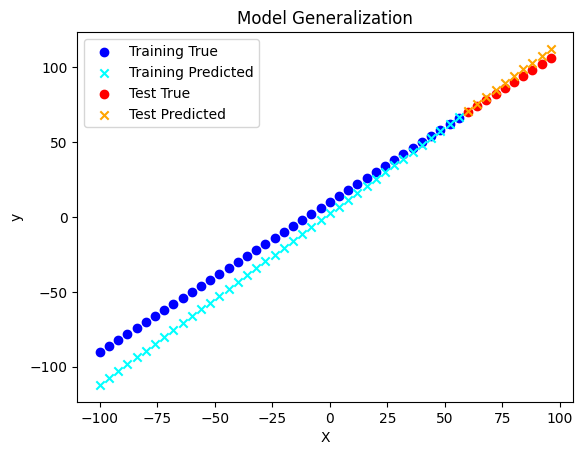

In [63]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

y_train_pred, y_test_pred


plt.scatter(X_train, Y_train, label='Training True', color='blue')
plt.scatter(X_train, y_train_pred, label='Training Predicted', color='cyan', marker='x')


plt.scatter(X_test, Y_test, label='Test True', color='red')
plt.scatter(X_test, y_test_pred, label='Test Predicted', color='orange', marker='x')

plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Model Generalization')
plt.show()




What’s happening on training data:

The cyan predicted points are consistently below the blue true points.

This means the model is not perfectly fitting the training data — it has a systematic bias (underfitting).

If the model were performing very well, the cyan crosses would overlap or be almost identical to the blue dots.
So, your thinking is right:

The model is not performing perfectly on the training set. It’s slightly underfitting because:

Predictions follow the correct trend/shape (so the model learned the relationship).

But there’s a constant shift (error offset) between predicted and actual values.

Big picture:

If the model performed poorly on training, that usually means high bias (underfitting).

If it performed well on training but poorly on test, that would mean high variance (overfitting).

Here, since both training and test are shifted but consistent → it’s high bias, low variance.

⚡In short: the model generalizes okay, but it doesn’t fit the training data tightly → it’s underfitting.

In [74]:
tf.random.set_seed(42)

model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(1,))
])

model2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=['mae']
)

c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [79]:
model2.fit(X_train,Y_train, epochs=150, verbose=1, validation_data=(X_test,Y_test))

Epoch 1/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step - loss: 22.9913 - mae: 4.2919 - val_loss: 79.5837 - val_mae: 8.9051
Epoch 2/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 22.8664 - mae: 4.2802 - val_loss: 79.1511 - val_mae: 8.8809
Epoch 3/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 22.7420 - mae: 4.2686 - val_loss: 78.7203 - val_mae: 8.8567
Epoch 4/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 22.6181 - mae: 4.2569 - val_loss: 78.2913 - val_mae: 8.8325
Epoch 5/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 22.4948 - mae: 4.2453 - val_loss: 77.8642 - val_mae: 8.8084
Epoch 6/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 22.3720 - mae: 4.2337 - val_loss: 77.4390 - val_mae: 8.7843
Epoch 7/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 22.2497 - mae: 4.2221 - val_loss: 77.0155 - val_mae: 8.7603
Epoch 8/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 22.1279 - mae: 4.2105 - val_loss: 76.5938 - val_mae: 8.7362
Epoch 9/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - los

In [84]:
test_input1= np.array([17.0]).reshape(1,-1)

prediction= model2.predict(test_input1)

print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
[[23.10191]]


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


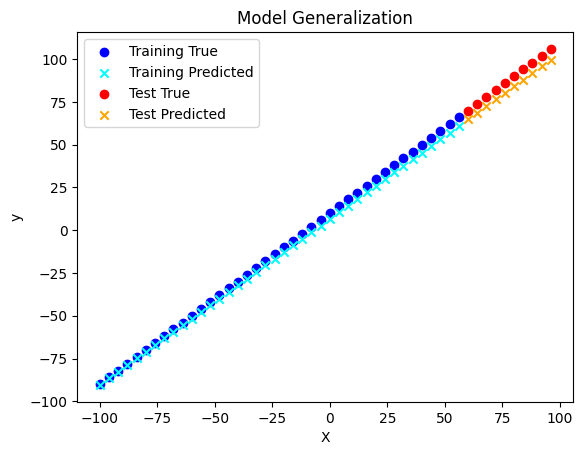

In [85]:
y_train_pred = model2.predict(X_train)
y_test_pred = model2.predict(X_test)

y_train_pred, y_test_pred


plt.scatter(X_train, Y_train, label='Training True', color='blue')
plt.scatter(X_train, y_train_pred, label='Training Predicted', color='cyan', marker='x')


plt.scatter(X_test, Y_test, label='Test True', color='red')
plt.scatter(X_test, y_test_pred, label='Test Predicted', color='orange', marker='x')

plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Model Generalization')
plt.show()
